In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("health_activity_data.csv")


# Display the first five rows
print(df.head())

# Basic info about the dataset
print(df.info())


   ID  Age  Gender  Height_cm  Weight_kg    BMI  Daily_Steps  Calories_Intake  \
0   1   56    Male        164         81  30.72         5134             1796   
1   2   69    Male        156         82  20.86        12803             1650   
2   3   46  Female        158         65  30.93        16408             1756   
3   4   32    Male        197         87  31.19        18420             2359   
4   5   60    Male        157         63  29.37        17351             2556   

   Hours_of_Sleep  Heart_Rate Blood_Pressure  Exercise_Hours_per_Week Smoker  \
0             8.6         102         137/72                      8.1     No   
1             4.5         103         129/65                      3.7     No   
2             4.3          74         127/68                      3.2    Yes   
3             4.1         116         125/86                      8.5     No   
4             5.1         111         100/64                      8.5    Yes   

   Alcohol_Consumption_per_Week 

In [5]:
# 2️⃣ Data Preprocessing and Cleaning
# Split Blood Pressure into Systolic and Diastolic
df[['Systolic', 'Diastolic']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)

# Convert Yes/No to 1/0
df['Smoker'] = df['Smoker'].map({'Yes': 1, 'No': 0})
df['Diabetic'] = df['Diabetic'].map({'Yes': 1, 'No': 0})
df['Heart_Disease'] = df['Heart_Disease'].map({'Yes': 1, 'No': 0})

# Create Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80], labels=['20-30','30-40','40-50','50-60','60-70','70-80'])

# Check for missing values
print(df.isnull().sum())

ID                               0
Age                              0
Gender                           0
Height_cm                        0
Weight_kg                        0
BMI                              0
Daily_Steps                      0
Calories_Intake                  0
Hours_of_Sleep                   0
Heart_Rate                       0
Blood_Pressure                   0
Exercise_Hours_per_Week          0
Smoker                           0
Alcohol_Consumption_per_Week     0
Diabetic                         0
Heart_Disease                    0
Systolic                         0
Diastolic                        0
Age_Group                       52
dtype: int64


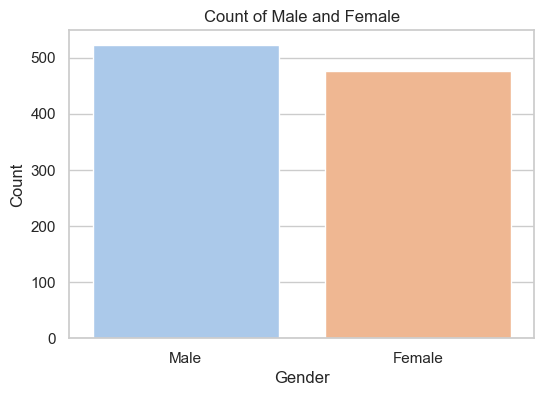

In [31]:
#  Data Visualisation
# Countplot for Gender (future-proof)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title('Count of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

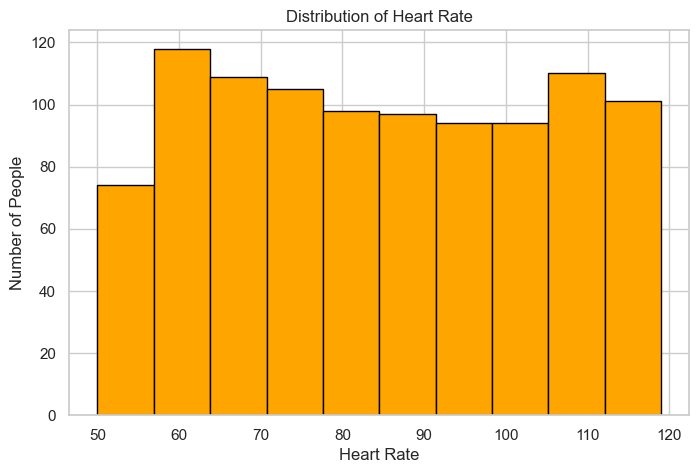

In [32]:
#Histogram for a Numeric Column (Heart Rate)
plt.figure(figsize=(8,5))
plt.hist(df['Heart_Rate'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Number of People')
plt.show()


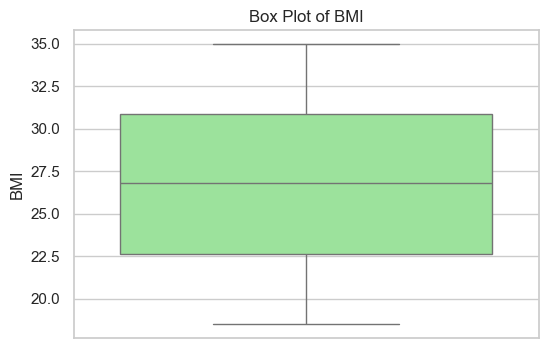

In [33]:
#Box Plot for a Numeric Column (BMI)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='BMI', color='lightgreen')
plt.title('Box Plot of BMI')
plt.ylabel('BMI')
plt.show()

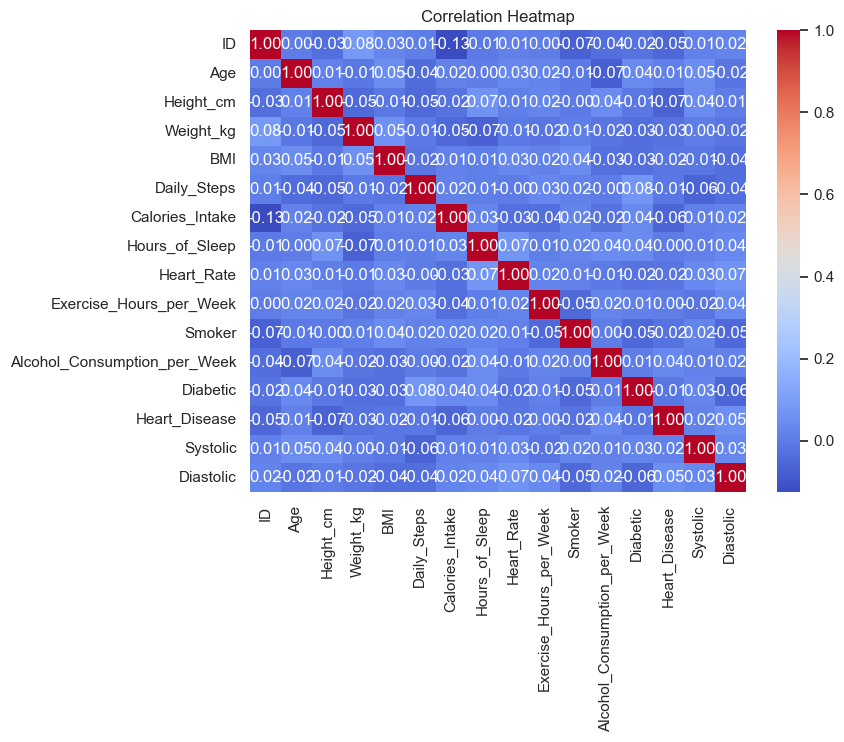

In [35]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

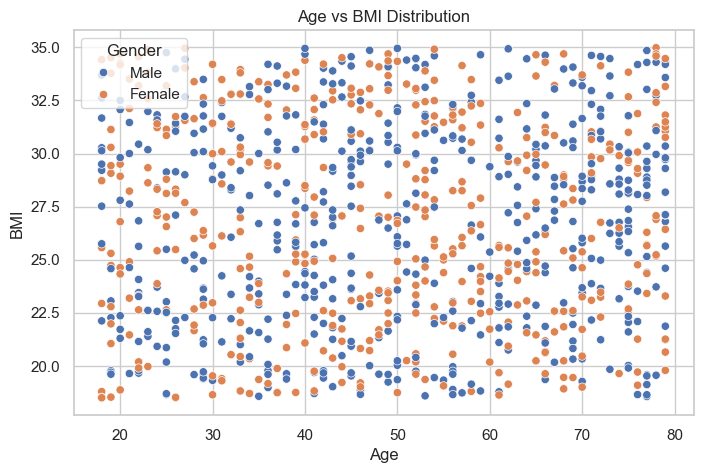

In [15]:
#objective 1: Age vs BMI Relationship
# Scatter Plot: Age vs BMI
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Gender')
plt.title('Age vs BMI Distribution')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

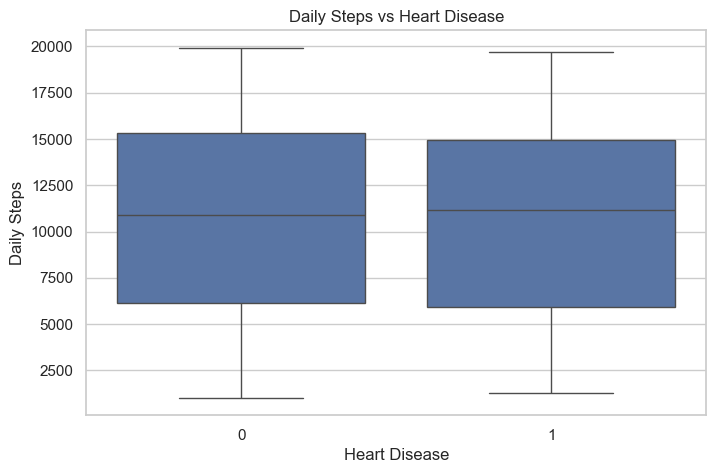

In [16]:
#Objective 2:️⃣ Daily Steps, Exercise & Heart Disease
# Box Plot: Daily Steps by Heart Disease status
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Heart_Disease', y='Daily_Steps')
plt.title('Daily Steps vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Daily Steps')
plt.show()


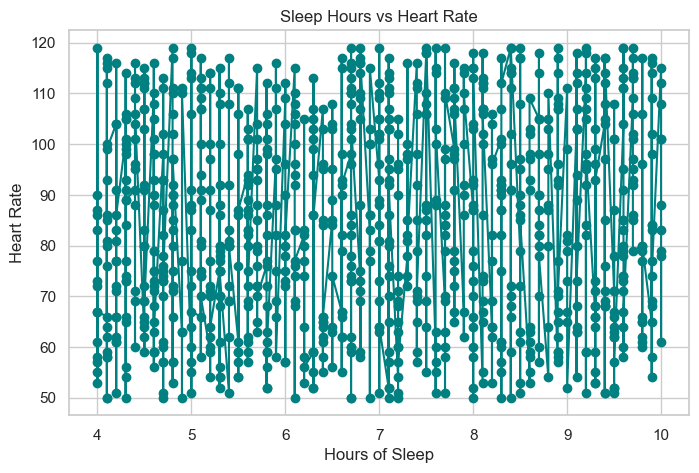

In [25]:
#Objective 3️⃣ Sleep Hours vs Heart Rate
# sort DataFrame by Hours_of_Sleep
df_sorted = df.sort_values('Hours_of_Sleep')
# Line Plot: Sleep Hours vs Heart Rate
plt.figure(figsize=(8,5))
plt.plot(df_sorted['Hours_of_Sleep'], df_sorted['Heart_Rate'], color='teal', marker='o', linestyle='-')
plt.title('Sleep Hours vs Heart Rate')
plt.xlabel('Hours of Sleep')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

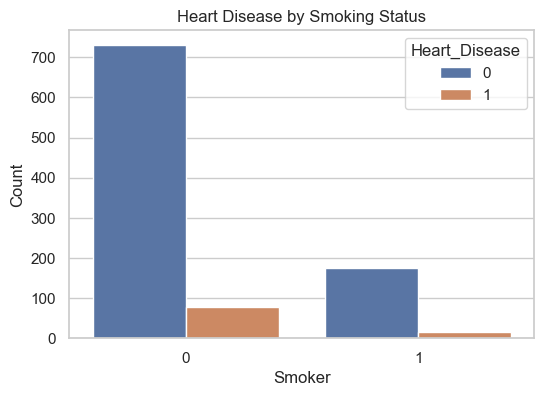

In [23]:
#Objective 4️⃣ Smoking, Alcohol & Heart Disease
# Bar Plot: Heart Disease percentage by Smoker
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Smoker', hue='Heart_Disease')
plt.title('Heart Disease by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


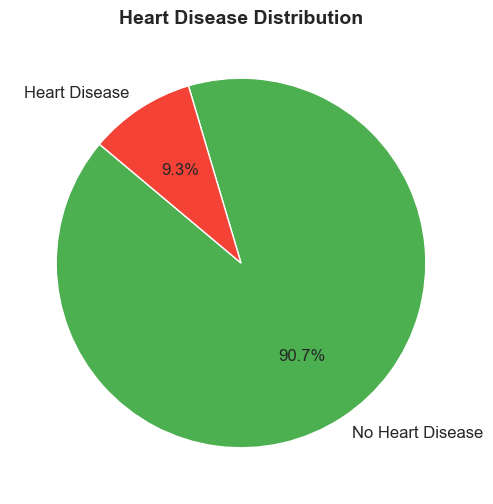

In [29]:
#Objective 5: visualize the percentage of people with and without heart disease.
# Count heart disease cases
heart_counts = df['Heart_Disease'].value_counts()

# Labels for the chart
labels = ['No Heart Disease', 'Heart Disease']

colors = ['#4CAF50', '#F44336']  # Green for healthy, Red for heart disease

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(heart_counts, labels=labels, autopct='%1.1f%%',
        colors=colors, startangle=140, textprops={'fontsize': 12})
plt.title('Heart Disease Distribution', fontsize=14, fontweight='bold')
plt.show()